In [115]:
from sqlalchemy.engine import create_engine, URL
import pandas as pd

In [117]:
SERVER = 'DESKTOP-HOME\\MSSQLSERVER02'  # localhost innebär att du ansluter till en server på din egen dator
DATABASE = 'AdventureWorks2022'

connection_string = f'DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={SERVER};DATABASE={DATABASE};Trusted_Connection=yes;Encrypt=no'

connection_url=URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})

engine = create_engine(connection_url)  # engine är anslutningsobjektet vi använder för att kommunicera med da

In [119]:
# Skriv en query. Använd trippla citationstecken runt textsträngen för att kunna ha radbrytningar i den.

query = """SELECT * FROM Production.Product
"""

# Skapa en DataFrame med resultaten av queryn.
products_df = pd.read_sql(query, engine)

In [120]:
products_df

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
0,1,Adjustable Race,AR-5381,False,False,None,1000,750,0.0000,0.00,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,694215B7-08F7-4C0D-ACB1-D734BA44C0C8,2014-02-08 10:01:36.827
1,2,Bearing Ball,BA-8327,False,False,None,1000,750,0.0000,0.00,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,58AE3C20-4F3A-4749-A7D4-D568806CC537,2014-02-08 10:01:36.827
2,3,BB Ball Bearing,BE-2349,True,False,None,800,600,0.0000,0.00,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E,2014-02-08 10:01:36.827
3,4,Headset Ball Bearings,BE-2908,False,False,None,800,600,0.0000,0.00,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,ECFED6CB-51FF-49B5-B06C-7D8AC834DB8B,2014-02-08 10:01:36.827
4,316,Blade,BL-2036,True,False,None,800,600,0.0000,0.00,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,E73E9750-603B-4131-89F5-3DD15ED5FF80,2014-02-08 10:01:36.827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,995,ML Bottom Bracket,BB-8107,True,True,None,500,375,44.9506,101.24,...,None,M,None,5.0,96.0,2013-05-30,NaT,None,71AB847F-D091-42D6-B735-7B0C2D82FC84,2014-02-08 10:01:36.827
500,996,HL Bottom Bracket,BB-9108,True,True,None,500,375,53.9416,121.49,...,None,H,None,5.0,97.0,2013-05-30,NaT,None,230C47C5-08B2-4CE3-B706-69C0BDD62965,2014-02-08 10:01:36.827
501,997,"Road-750 Black, 44",BK-R19B-44,True,True,Black,100,75,343.6496,539.99,...,R,L,U,2.0,31.0,2013-05-30,NaT,None,44CE4802-409F-43AB-9B27-CA53421805BE,2014-02-08 10:01:36.827
502,998,"Road-750 Black, 48",BK-R19B-48,True,True,Black,100,75,343.6496,539.99,...,R,L,U,2.0,31.0,2013-05-30,NaT,None,3DE9A212-1D49-40B6-B10A-F564D981DBDE,2014-02-08 10:01:36.827


# RELATIONAL DATABASE 
A relational databasse organises data into tables with rows and columns .These tables connect through primary keys and foreign keys to form relationship.


# "CRUD" FLOW
This refers to the four basic operations in SQL which are Create, Read,Updat and Delete.With the create operation, you can insert new records into a table, with the read functtion, you retrieve data from a table,withe the update function you one can modify and already existing data in a table and with the delete function we remove records from a table.

# LEFT JOINT AND INNER JOIN
left  join returns all rows from the left table and matching rows from the right table but if there is noi join "NULL" is return from the right table.


# INDEXING IN SQL
This is a mechanism which is use in the retrieving of rows in a table.It helps in improving query performance by acting as a pointer to a data.


# MEANING OF VIEW IN SQL
This is a virtual table generated based on the result of an sql query. It does not actually store data by itself but helps to fetch it faster.



# STORED PROCEDURE
This is an already compiled set set of SQL statement stored in the database.




## Section 2

## Task 1
  ## DESCRIPTIVE summary
  The AdventureWorks2022 database is a sample database provided by Microsoft to showcase the capabilities of SQL Server. It includes various business aspects such as sales, production, and human resources. The database is divided into several schemas, each representing different business areas. Common schemas include Sales, Production, HumanResources, Person, and Purchasing. Each schema contains multiple tables. For example, the Sales schema includes tables like SalesOrderHeader, SalesOrderDetail, Customer, and SalesPerson.
The database is designed with relationships between tables to ensure integrity and to model real-world business processes. For example, the SalesOrderHeader table is related to the SalesOrderdetail through the Foreign Key SalesOrderID. Also, the Person.StateProvince is related to the Sales.SalesTerritory through the Foreign Key CountryRegionCode.


In [158]:

# SQL query to get the list of tables in the AdventureWorks database
query = """
SELECT TABLE_SCHEMA, TABLE_NAME
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_TYPE = 'BASE TABLE'
ORDER BY TABLE_SCHEMA, TABLE_NAME;
"""
df = pd.read_sql(query, engine)
print(df)


      TABLE_SCHEMA             TABLE_NAME
0              dbo         AWBuildVersion
1              dbo            DatabaseLog
2              dbo               ErrorLog
3              dbo            sysdiagrams
4   HumanResources             Department
..             ...                    ...
68           Sales  SalesTerritoryHistory
69           Sales       ShoppingCartItem
70           Sales           SpecialOffer
71           Sales    SpecialOfferProduct
72           Sales                  Store

[73 rows x 2 columns]


In [129]:
   #This query retrieves data from the SalesOrderHeader and SalesOrderDetail tables.
   #It uses an INNER JOIN to combine the tables based on the SalesOrderID column.
   #The selected columns provide a comprehensive view of the sales order, including order dates and product details.
  
#Below is a demonstration of how pure SQL works within the SSMS to retrieve data from the database based on their relationship.

query="""SELECT
    soh.SalesOrderID,  -- Selects the SalesOrderID from SalesOrderHeader
    soh.OrderDate,     -- Selects the OrderDate from SalesOrderHeader
    soh.DueDate,       -- Selects the DueDate from SalesOrderHeader
    soh.ShipDate,      -- Selects the ShipDate from SalesOrderHeader
    sod.OrderQty,      -- Selects the OrderQty from SalesOrderDetail
    sod.ProductID,     -- Selects the ProductID from SalesOrderDetail
    sod.UnitPrice,     -- Selects the UnitPrice from SalesOrderDetail
    sod.LineTotal      -- Selects the LineTotal from SalesOrderDetail
FROM 
    Sales.SalesOrderHeader AS soh -- Alias for SalesOrderHeader
INNER JOIN 
    Sales.SalesOrderDetail AS sod -- Alias for SalesOrderDetail
ON 
    soh.SalesOrderID = sod.SalesOrderID; -- Join condition on SalesOrderID"""


soh = pd.read_sql(query, engine)
soh

,SalesOrderID,OrderDate,DueDate,ShipDate,OrderQty,ProductID,UnitPrice,LineTotal
0,43659,2011-05-31,2011-06-12,2011-06-07,1,776,2024.994,2024.994
1,43659,2011-05-31,2011-06-12,2011-06-07,3,777,2024.994,6074.982
2,43659,2011-05-31,2011-06-12,2011-06-07,1,778,2024.994,2024.994
3,43659,2011-05-31,2011-06-12,2011-06-07,1,771,2039.994,2039.994
4,43659,2011-05-31,2011-06-12,2011-06-07,1,772,2039.994,2039.994
...,...,...,...,...,...,...,...,...
121312,75122,2014-06-30,2014-07-12,2014-07-07,1,878,21.980,21.980
121313,75122,2014-06-30,2014-07-12,2014-07-07,1,712,8.990,8.990
121314,75123,2014-06-30,2014-07-12,2014-07-07,1,878,21.980,21.980
121315,75123,2014-06-30,2014-07-12,2014-07-07,1,879,159.000,159.000


In [151]:
#Query to get Orderdate and Orederquantity
query = """
SELECT soh.OrderDate, sod.OrderQty
FROM Sales.SalesOrderHeader AS soh
INNER JOIN Sales.SalesOrderDetail AS sod
ON soh.SalesOrderID = sod.SalesOrderID;
"""

df = pd.read_sql(query, engine)
print(df)

        OrderDate  OrderQty
0      2011-05-31         1
1      2011-05-31         3
2      2011-05-31         1
3      2011-05-31         1
4      2011-05-31         1
...           ...       ...
121312 2014-06-30         1
121313 2014-06-30         1
121314 2014-06-30         1
121315 2014-06-30         1
121316 2014-06-30         1

[121317 rows x 2 columns]


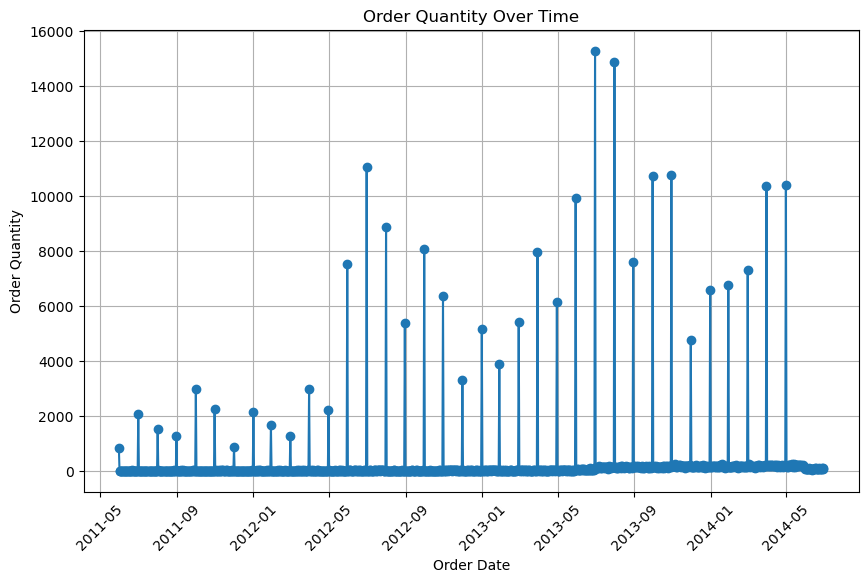

In [160]:
# graffic representation of the OrderQuantity ooover time and the OrderDate
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, URL
engine = create_engine(connection_url)

# SQL query to get the data
query = """
SELECT soh.OrderDate, sod.OrderQty
FROM Sales.SalesOrderHeader AS soh
INNER JOIN Sales.SalesOrderDetail AS sod
ON soh.SalesOrderID = sod.SalesOrderID;
"""
df = pd.read_sql(query, engine)

# Function to plot the graph
def plot_order_quantity(df):
    # Convert OrderDate to datetime format
    df['OrderDate'] = pd.to_datetime(df['OrderDate'])
    
    # Group by OrderDate and sum the OrderQty
    df_grouped = df.groupby('OrderDate').sum().reset_index()
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(df_grouped['OrderDate'], df_grouped['OrderQty'], marker='o')
    plt.title('Order Quantity Over Time')
    plt.xlabel('Order Date')
    plt.ylabel('Order Quantity')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
    
plot_order_quantity(df)


In [51]:
#  convert orderdate to datetime format
soh['OrderDate'] = pd.to_datetime(soh['OrderDate'])

# Extract year and months into seperate columns
soh['Year'] = soh['OrderDate'].dt.year
soh['Month'] = soh['OrderDate'].dt.month
soh

,SalesOrderID,OrderDate,DueDate,ShipDate,OrderQty,ProductID,UnitPrice,LineTotal,Year,Month
0,43659,2011-05-31,2011-06-12,2011-06-07,1,776,2024.994,2024.994,2011,5
1,43659,2011-05-31,2011-06-12,2011-06-07,3,777,2024.994,6074.982,2011,5
2,43659,2011-05-31,2011-06-12,2011-06-07,1,778,2024.994,2024.994,2011,5
3,43659,2011-05-31,2011-06-12,2011-06-07,1,771,2039.994,2039.994,2011,5
4,43659,2011-05-31,2011-06-12,2011-06-07,1,772,2039.994,2039.994,2011,5
...,...,...,...,...,...,...,...,...,...,...
121312,75122,2014-06-30,2014-07-12,2014-07-07,1,878,21.980,21.980,2014,6
121313,75122,2014-06-30,2014-07-12,2014-07-07,1,712,8.990,8.990,2014,6
121314,75123,2014-06-30,2014-07-12,2014-07-07,1,878,21.980,21.980,2014,6
121315,75123,2014-06-30,2014-07-12,2014-07-07,1,879,159.000,159.000,2014,6


## VISUALISATION

C:\Users\lesle\AppData\Local\Temp\ipykernel_8004\1457697125.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  soh_resampled = soh['OrderQty'].resample('6M').sum()


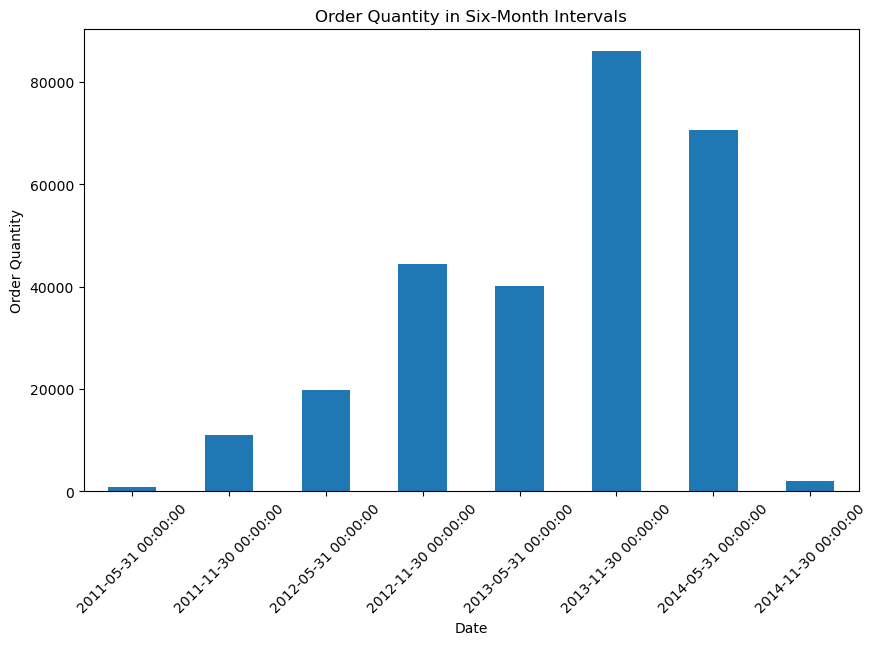

In [110]:
 import matplotlib.pyplot as plt
soh.set_index('OrderDate', inplace = True)

soh_resampled = soh['OrderQty'].resample('6M').sum()

# Plot the data
plt.figure(figsize=(10, 6))
soh_resampled.plot(kind='bar')
plt.title('Order Quantity in Six-Month Intervals')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.xticks(rotation=45)
plt.show()

  Looking at the bar chart presented above, it shows that the company got its highest order in the month of Noember 2013 and its lowest was in November 2011.

## Task 2

In [31]:
#Define the SQL query to select all vcolumns from the Productvendor table
query = """SELECT * FROM [AdventureWorks2022].[Purchasing].[ProductVendor] """

product_vendor = pd.read_sql(query,engine)

product_vendor

,ProductID,BusinessEntityID,AverageLeadTime,StandardPrice,LastReceiptCost,LastReceiptDate,MinOrderQty,MaxOrderQty,OnOrderQty,UnitMeasureCode,ModifiedDate
0,1,1580,17,47.87,50.2635,2011-08-29,1,5,3.0,CS,2011-08-29
1,2,1688,19,39.92,41.9160,2011-08-29,1,5,3.0,CTN,2011-08-29
2,4,1650,17,54.31,57.0255,2011-08-29,1,5,NaN,CTN,2011-08-29
3,317,1578,19,28.17,29.5785,2011-08-29,100,1000,300.0,EA,2011-08-29
4,317,1678,17,25.77,27.0585,2011-08-25,100,1000,NaN,EA,2011-08-25
...,...,...,...,...,...,...,...,...,...,...,...
455,939,1680,16,45.99,48.2895,2011-08-27,100,1000,NaN,EA,2011-08-27
456,940,1508,15,59.99,62.9895,2011-08-26,100,1000,NaN,EA,2011-08-26
457,941,1628,17,59.99,62.9895,2011-08-25,100,1000,NaN,EA,2011-08-25
458,948,1576,19,78.89,82.8345,2011-08-29,100,1000,NaN,EA,2011-08-29


In [39]:
#Calculate all the recoerds in the Product_Vendor DataFrame
total_records = len(product_vendor)
total_records

460

In [41]:
#Calculate the number of null values in each column and convert the result to a dictionary

Null_Values = product_vendor.isnull().sum().to_dict()
Null_Values

{'ProductID': 0,
 'BusinessEntityID': 0,
 'AverageLeadTime': 0,
 'StandardPrice': 0,
 'LastReceiptCost': 0,
 'LastReceiptDate': 0,
 'MinOrderQty': 0,
 'MaxOrderQty': 0,
 'OnOrderQty': 305,
 'UnitMeasureCode': 0,
 'ModifiedDate': 0}

In [43]:
#Generate descriptive statistics for the Product _Vendor DataFrame

product_vendor.describe()

,ProductID,BusinessEntityID,AverageLeadTime,StandardPrice,LastReceiptCost,LastReceiptDate,MinOrderQty,MaxOrderQty,OnOrderQty,ModifiedDate
count,460.000000,460.000000,460.000000,460.000000,460.000000,460,460.000000,460.000000,155.000000,460
mean,517.247826,1593.256522,19.450000,34.676543,36.275895,2011-12-10 01:30:46.956521984,145.908696,776.467391,660.735484,2012-02-04 14:32:39.848254464
min,1.000000,1492.000000,10.000000,0.200000,0.210000,2011-07-22 00:00:00,1.000000,5.000000,3.000000,2011-07-22 00:00:00
25%,382.750000,1540.000000,16.000000,31.085000,31.489500,2011-08-12 00:00:00,1.000000,5.000000,3.000000,2011-08-12 00:00:00
50%,434.500000,1584.000000,17.000000,39.260000,41.196750,2011-08-22 00:00:00,1.000000,5.000000,150.000000,2011-08-22 00:00:00
75%,515.500000,1656.000000,19.000000,43.260000,45.423000,2011-08-28 00:00:00,100.000000,1000.000000,300.000000,2011-08-28 00:00:00
max,952.000000,1698.000000,120.000000,78.890000,82.834500,2014-10-22 00:00:00,5000.000000,15000.000000,8000.000000,2015-08-12 12:20:28.343000
std,205.099815,61.435226,9.289328,13.501835,14.247035,NaN,632.590452,2081.799375,1567.226701,NaN


In [45]:
product_vendor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ProductID         460 non-null    int64         
 1   BusinessEntityID  460 non-null    int64         
 2   AverageLeadTime   460 non-null    int64         
 3   StandardPrice     460 non-null    float64       
 4   LastReceiptCost   460 non-null    float64       
 5   LastReceiptDate   460 non-null    datetime64[ns]
 6   MinOrderQty       460 non-null    int64         
 7   MaxOrderQty       460 non-null    int64         
 8   OnOrderQty        155 non-null    float64       
 9   UnitMeasureCode   460 non-null    object        
 10  ModifiedDate      460 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(5), object(1)
memory usage: 39.7+ KB


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [57]:
# Define a function to calculate the confidence interval .
def confidence_interval(data, confidence=0.95):
    sample = data.dropna()#Remove null values from the data
    n = len(sample) #Clculate the sample size
    mean = np.mean(sample)# Calculate the mean of the sample
    std_err = stats.sem(sample)# Calculate the standard error of the mean
    margin_of_error = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)#Calculate the margin of error
    return mean, mean - margin_of_error, mean + margin_of_error# return the mean and confidence interval

# Confidence interval for the standard price column.
ci_mean, ci_lower, ci_upper = confidence_interval(product_vendor["StandardPrice"])
{"Mean Standard Price": ci_mean, "Confidence Interval": (ci_lower, ci_upper)}

{'Mean Standard Price': 34.67654347826086,
 'Confidence Interval': (33.439432540207484, 35.91365441631424)}

 ## Interpretation of result

With the mean standard price which is 34.7 and the 95% confidence interval for the mean standard price lies between 33.4 and 35.9, this helps to provide a measure of the precision of your estimate.Looking at it, a narrower interval will defintely provide you with a more precise estimate while a wider interval will indicates less precision.With this result, it will help with a precise estimate of the standard price.

## TASK 3

## Analysis, Conclusion and Recommendation

Looking at the Product_Vendor table which i used, we have different columns and roles for example the The ProductID, StandardPrice,BuisnessEntityID, StandardPrice which is what i use in calculating the confidence interval,it shows that the company is making profit.With this information above, it can help the company to make important decisions about the budgeting,pricision and important future decisions about the company fro example when setting prices, they can set it within a certain range to ensure profitability and  compettitiveness. The confidence interval helps to give the company an insights into the variability and reliability of the mean standard price, this helping the company to make more informed and confident decisions.

# Executive Summary

In the first part of the assignment ,i briefly described some key concept of SQL like stored procedure,relational database ,left join ,inner join  and others.
  Moving to the second part which is more of programing, the first part of the task is just a brief description of the AdventureWorks database . The main purpose is to get a general overview of the database which i later continue to write some query. With the query i wrote,it helps to show all the tables in the dventureWorks database, how to select a table and present  the different rows and columns which are in the table,the OrderDate and OrderQty.I later moved forward by writing a code which was to seperate the year and month into a seperate column which i wanted to use for the visualisation of the data. The visualisation which is in the form of a chart shows the order within a 6 months period.
  The next part which i worked with the Product_Vendor table, i first gave the statistical analysis of the table,followed by calculating the confidence interval and later the calculation and the interpretation.
  The concluding part of the task was the analysis,conclusion and recomendation of the data and result thta was produced.
  

#Difficulties and solution

Giving the fact that the course is a whole new course for me and i am studying online makes it a bit difficult because it requires a lot of self studies and research. What i try to do is to find more sql documents and videos to watch and i have good classmates whom we can share ideas

#Grade

I am hoping for a G because i do not know if my understanding of the question was exactly what was required but i tried to answer it the way i undersatnd it.

In [ ]:
Did my presentation today together with the Malmö class.